In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import missingno as msno
import seaborn as sns
import numpy as np

In [6]:
# Load the loan data
loan_all_df = pd.read_csv("loan.csv", low_memory=False)
loan_all_df.shape

(39717, 111)

In [7]:
loan_all_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


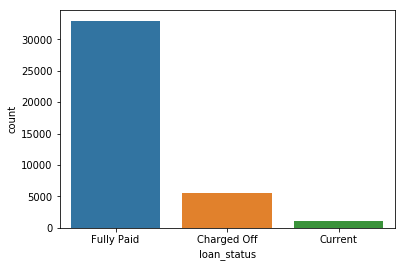

In [8]:
sns.countplot(loan_all_df.loan_status)

In [9]:
# Keep only the rows where loan_status is not Current
loan_df = loan_all_df.loc[loan_all_df.loan_status != 'Current']
loan_df.shape

(38577, 111)

## Data Sanity Checks

In [11]:
# Find out percentage of missing values in each column
columns = loan_df.columns
percent_missing = loan_df.isnull().sum() * 100 / len(loan_df)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending = False, inplace=True)
missing_value_df[missing_value_df.percent_missing == 100]

,column_name,percent_missing
verification_status_joint,verification_status_joint,100.0
annual_inc_joint,annual_inc_joint,100.0
mo_sin_old_rev_tl_op,mo_sin_old_rev_tl_op,100.0
mo_sin_old_il_acct,mo_sin_old_il_acct,100.0
bc_util,bc_util,100.0
bc_open_to_buy,bc_open_to_buy,100.0
avg_cur_bal,avg_cur_bal,100.0
acc_open_past_24mths,acc_open_past_24mths,100.0
inq_last_12m,inq_last_12m,100.0
total_cu_tl,total_cu_tl,100.0


In [12]:
# list the columns that have 100% missing values
list(missing_value_df.loc[missing_value_df.percent_missing == 100,'column_name'])

['verification_status_joint',
 'annual_inc_joint',
 'mo_sin_old_rev_tl_op',
 'mo_sin_old_il_acct',
 'bc_util',
 'bc_open_to_buy',
 'avg_cur_bal',
 'acc_open_past_24mths',
 'inq_last_12m',
 'total_cu_tl',
 'inq_fi',
 'total_rev_hi_lim',
 'all_util',
 'max_bal_bc',
 'open_rv_24m',
 'open_rv_12m',
 'il_util',
 'total_bal_il',
 'mths_since_rcnt_il',
 'open_il_24m',
 'open_il_12m',
 'open_il_6m',
 'open_acc_6m',
 'tot_cur_bal',
 'tot_coll_amt',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'num_rev_tl_bal_gt_0',
 'total_bc_limit',
 'total_bal_ex_mort',
 'tot_hi_cred_lim',
 'percent_bc_gt_75',
 'pct_tl_nvr_dlq',
 'num_tl_op_past_12m',
 'num_tl_90g_dpd_24m',
 'num_tl_30dpd',
 'num_tl_120dpd_2m',
 'num_sats',
 'num_rev_accts',
 'mths_since_recent_bc',
 'num_op_rev_tl',
 'num_il_tl',
 'num_bc_tl',
 'num_bc_sats',
 'num_actv_rev_tl',
 'num_actv_bc_tl',
 'num_accts_ever_120_pd',
 'mths_since_recent_revol_delinq',
 'mths_since_recent_inq',
 'mths_since_recent_bc_dlq',
 'dti_joint',
 '

In [13]:
# drop columns that have 100% mising values
loan_df.drop(columns=list(missing_value_df.loc[missing_value_df.percent_missing == 100,'column_name']),inplace = True)
loan_df.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(38577, 56)

In [14]:
# find out columns that have 0 standard deviation
loan_df.std()[loan_df.std() == 0]

out_prncp                     0.0
out_prncp_inv                 0.0
collections_12_mths_ex_med    0.0
policy_code                   0.0
acc_now_delinq                0.0
chargeoff_within_12_mths      0.0
delinq_amnt                   0.0
tax_liens                     0.0
dtype: float64

In [15]:
# dropping column with standard deviation 0
loan_df.drop(loan_df.std()[loan_df.std() == 0.0].index.values, axis=1,inplace = True)
loan_df.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(38577, 48)

In [16]:
# checking whether there are columns having single values. Standard deviation check will not work for non-numeric columns
uniques = loan_df.apply(lambda x: x.nunique())
uniques[uniques==1]

pymnt_plan             1
initial_list_status    1
application_type       1
dtype: int64

In [17]:
# dropping columns having single values
loan_df = loan_df.drop(uniques[uniques==1].index, axis=1)
loan_df.shape

(38577, 45)

## Business Understanding

In [18]:
# Drop columns that will not be available at the time of aproving loan
columns_to_remove = ['last_credit_pull_d',
                     'last_pymnt_amnt',
                    'collection_recovery_fee',
                     'delinq_2yrs',
                     'mths_since_last_delinq',
                     'last_pymnt_d',
                     'recoveries',
                     'total_pymnt',
                     'total_pymnt_inv',
                     'total_rec_int',
                     'total_rec_late_fee',
                     'total_rec_prncp'
                    ]
loan_df.drop(columns_to_remove , axis = 1 , inplace = True)
loan_df.shape

(38577, 33)

## Data Understanding

In [19]:
# Drop columns that will can not have any impact
columns_to_remove = ['title' , # very high variance
                     'emp_title' # very high variance
                    ]
loan_df.drop(columns_to_remove , axis = 1 , inplace = True)
loan_df.shape

(38577, 31)

In [20]:
# checking whether there are duplicate rows
loan_df.duplicated().sum()

0

In [21]:
# Check potential unique value fields 
df_colunique = pd.DataFrame(loan_df.nunique()/loan_df.count())
# Columns having all unique values excludeing Nulls
df_colunique.loc[df_colunique[0] >= 0.99]

,0
id,1.000000
member_id,1.000000
url,1.000000
desc,0.990518


In [22]:
# drop the columns where each row has unique values
loan_df.drop(df_colunique.loc[df_colunique[0] >= 0.99].index, axis=1, inplace= True)
loan_df.shape

(38577, 27)

In [23]:
# Strip all columns for leading and lagging spaces

loan_df = loan_df.applymap(lambda s : s.strip() if type(s) is str else s)

In [24]:
# Remove string months from term 6 

loan_df.term = loan_df.term.apply(lambda s : s[0:s.index(' ')] if ' ' in s else s)
loan_df.term = pd.to_numeric(loan_df.term)
loan_df.term.head()

0    36
1    60
2    36
3    36
5    36
Name: term, dtype: int64

In [25]:
# Remove % sign from interest rate 
loan_df.int_rate = loan_df.int_rate.apply(lambda s : s[0:s.index('%')] if '%' in s else s)
loan_df.int_rate = pd.to_numeric(loan_df.int_rate)
loan_df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [26]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
loan_amnt                 38577 non-null int64
funded_amnt               38577 non-null int64
funded_amnt_inv           38577 non-null float64
term                      38577 non-null int64
int_rate                  38577 non-null float64
installment               38577 non-null float64
grade                     38577 non-null object
sub_grade                 38577 non-null object
emp_length                37544 non-null object
home_ownership            38577 non-null object
annual_inc                38577 non-null float64
verification_status       38577 non-null object
issue_d                   38577 non-null object
loan_status               38577 non-null object
purpose                   38577 non-null object
zip_code                  38577 non-null object
addr_state                38577 non-null object
dti                       38577 non-null float64
earliest_cr_line         

In [27]:
# visualize missing data
msno.matrix(loan_df)

NameError: name 'msno' is not defined

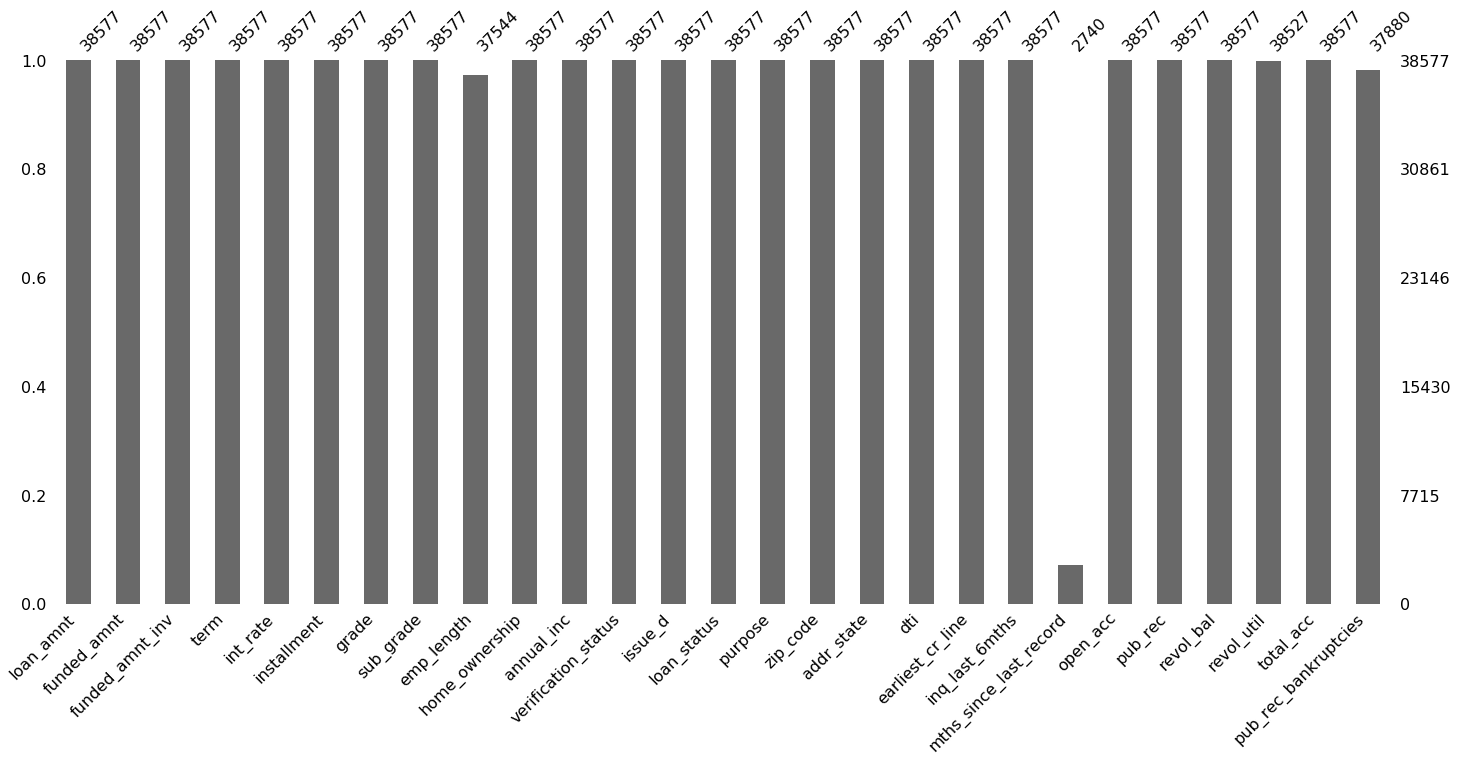

In [23]:
msno.bar(loan_df)

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

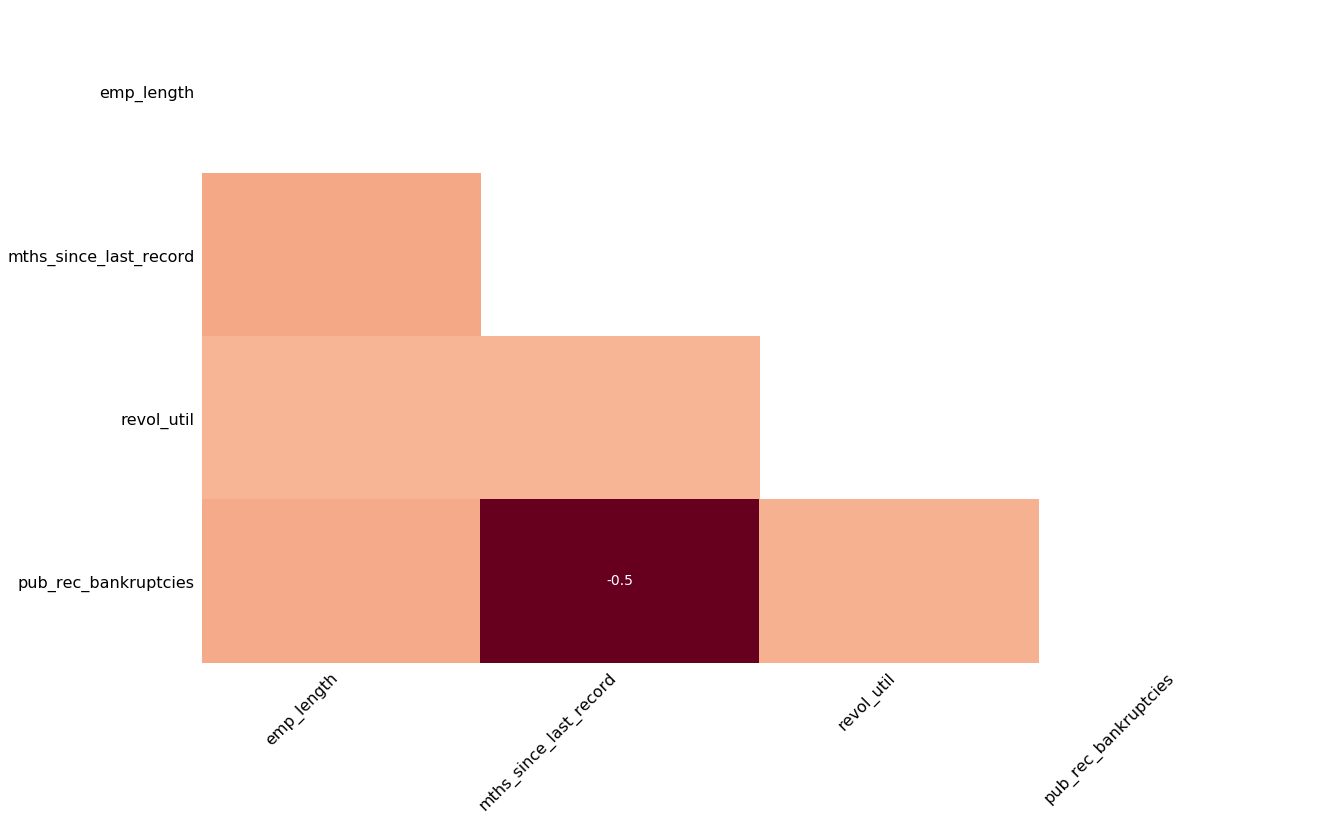

In [24]:
msno.heatmap(loan_df)

In [29]:
# Impute missing values
values = {'emp_length': 'NA', 'revol_util': 0, 'mths_since_last_record': -1, 'pub_rec_bankruptcies':0}
loan_df.fillna(value=values, inplace = True)


In [30]:
msno.bar(loan_df)

NameError: name 'msno' is not defined

In [31]:
# writing load data frame with reduced columns in a csv
loan_df.to_csv('loan_df_reduced.csv')

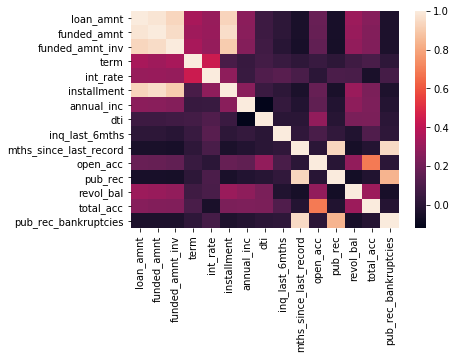

In [32]:
# this is correlation plot for all numeric variables
sns.heatmap(loan_df.corr())

In [33]:
loan_df.corr().style.background_gradient()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,inq_last_6mths,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
loan_amnt,1,0.98179,0.937922,0.34665,0.301265,0.93226,0.268999,0.0624358,0.01294,-0.0440968,0.1772,-0.0499975,0.314022,0.256179,-0.0351408
funded_amnt,0.98179,1,0.956172,0.324893,0.30493,0.958035,0.264798,0.0621941,0.0128569,-0.0450441,0.175682,-0.0505762,0.306501,0.250551,-0.0361889
funded_amnt_inv,0.937922,0.956172,1,0.343922,0.297473,0.905464,0.251981,0.070663,-0.00280027,-0.0471814,0.162738,-0.0514702,0.286265,0.242715,-0.036327
term,0.34665,0.324893,0.343922,1,0.440206,0.0904558,0.0438658,0.076182,0.0477079,0.0148981,0.0461625,0.0102661,0.0664109,0.0961683,0.0166903
int_rate,0.301265,0.30493,0.297473,0.440206,1,0.277203,0.0488991,0.110913,0.133362,0.0942669,0.00602205,0.0986354,0.0941787,-0.046539,0.0840158
installment,0.93226,0.958035,0.905464,0.0904558,0.277203,1,0.267842,0.0520385,0.0110144,-0.0411206,0.172893,-0.0457055,0.309501,0.22986,-0.0330383
annual_inc,0.268999,0.264798,0.251981,0.0438658,0.0488991,0.267842,1,-0.12153,0.0354651,-0.0176706,0.156927,-0.017864,0.277374,0.234534,-0.0159546
dti,0.0624358,0.0621941,0.070663,0.076182,0.110913,0.0520385,-0.12153,1,0.00217837,0.00437102,0.287849,-0.00474244,0.22809,0.229119,0.00731548
inq_last_6mths,0.01294,0.0128569,-0.00280027,0.0477079,0.133362,0.0110144,0.0354651,0.00217837,1,0.0209267,0.0934343,0.0237263,-0.020787,0.113516,0.014821
mths_since_last_record,-0.0440968,-0.0450441,-0.0471814,0.0148981,0.0942669,-0.0411206,-0.0176706,0.00437102,0.0209267,1,0.00609323,0.935876,-0.0543542,-0.0162151,0.951221


In [34]:
# find columns where they have absolute correlation greater than 0.5 with some other column
corr_matrix = loan_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_keep_col = [column for column in upper.columns if any(upper.loc[:,column] >=0.5)]
to_keep_row = [row for row in upper.index if any(upper.loc[row,:] >=0.5)]
to_keep = list(set(to_keep_col).union(set(to_keep_row)))
to_keep

['total_acc',
 'funded_amnt',
 'open_acc',
 'loan_amnt',
 'funded_amnt_inv',
 'pub_rec_bankruptcies',
 'pub_rec',
 'mths_since_last_record',
 'installment']

Lets Focus on these highly correlated columns to derive new features.

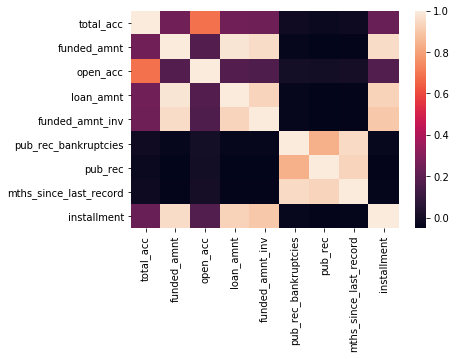

In [35]:
#subset dataframe on highly correlated columns
loan_high_corr_df = loan_df.loc[:,to_keep]
sns.heatmap(loan_high_corr_df.corr())

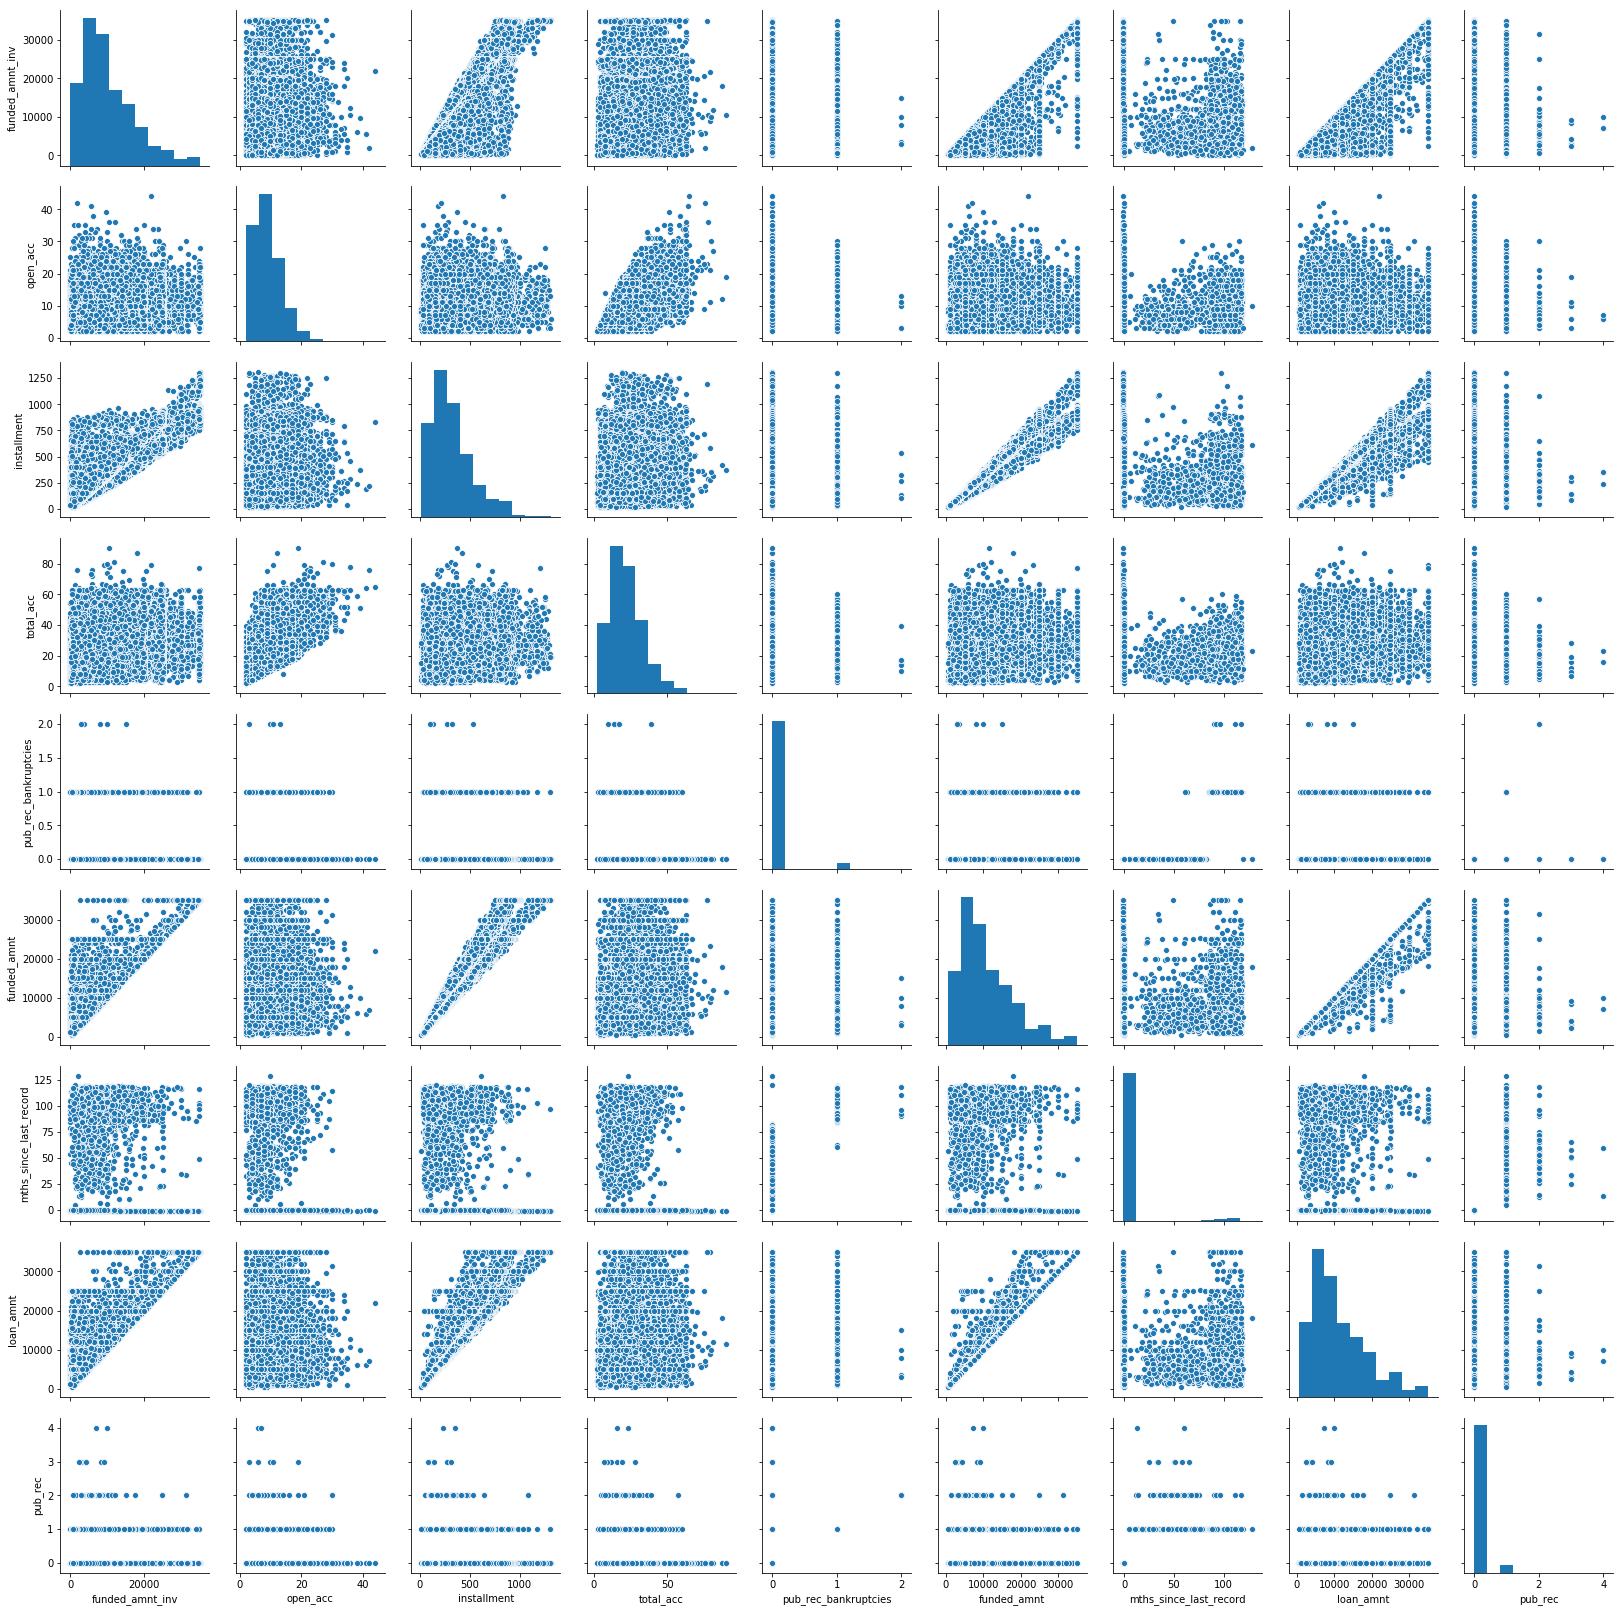

In [32]:
# pairwise plot - commented as it is making notebook heavy
# sns.pairplot(loan_high_corr_df)

### Peeyush Updates start here

**understanding `mths_since_last_record`** 
<br>
The number of months since the last public record.



In [51]:
loan_df['mths_since_last_record'].describe()

count    38577.000000
mean         3.990409
std         21.520220
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        129.000000
Name: mths_since_last_record, dtype: float64

In [36]:
# Doing Univariate analysis on mths_since_last_record

<div class="alert alert-block alert-info">
Using Kamal's function for Univariate analysis for quantitative variable
</div>

In [37]:
# Univariate analysis for quantitative variable 

def uni_analysis_num (x , type = 'r'):
    sns.set(rc={'figure.figsize':(15,6)})
    f, axes = plt.subplots(1, 2)
    
    print('Variable =' , x.columns[0])
    print('Mean Value ', x.iloc[:,0].mean() )
    print('Median ', x.iloc[:,0].median() )
   
    print('****************************************************************************************************')
    # print(x.iloc[:,0].value_counts())
    sns.boxplot( y = x.iloc[:,0], data = x , ax = axes[0])
    sns.violinplot( x = x.iloc[:,1] , y = x.iloc[:,0] , data = x , ax = axes[1], \
                   vert = True , inner = 'quartile' ,scale_hue = True )
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #print('****************************************************************************************************')
    #print(pd.crosstab(x.iloc[:,0] ,x.iloc[:,1] , margins = True , margins_name = 'Total' , normalize = True).round(4) * 100)

Variable = mths_since_last_record
Mean Value  3.9904087928040024
Median  -1.0
****************************************************************************************************


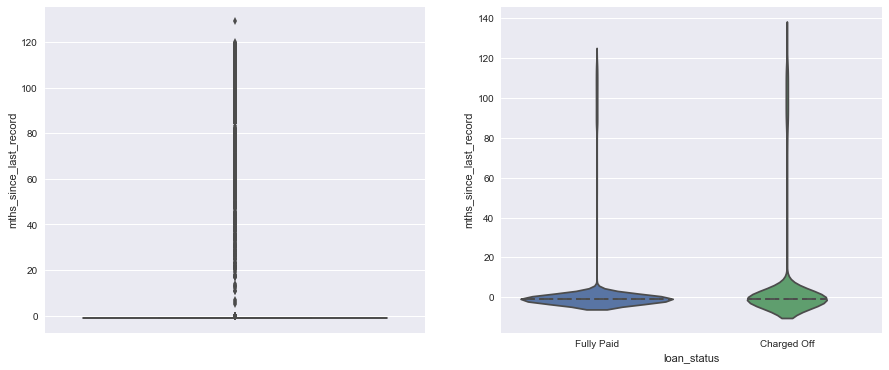

In [40]:
uni_analysis_num(loan_df[['mths_since_last_record', 'loan_status']])

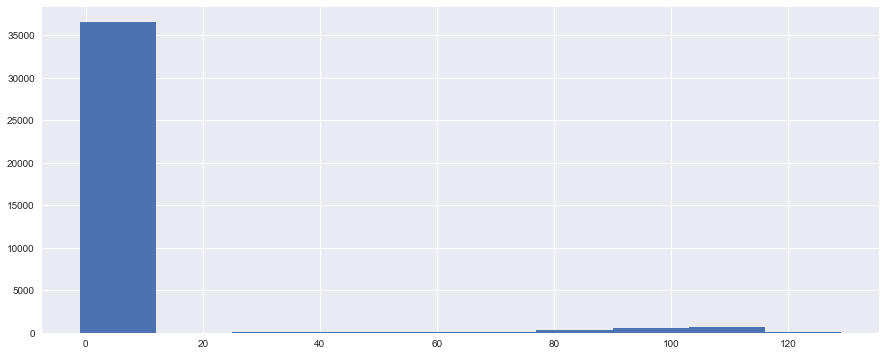

In [61]:
num_bins = 10
n, bins, patches = plt.hist(loan_df.mths_since_last_record, num_bins)
plt.show()

**Business understanding `mths_since_last_record`** 
<br>
The spread for fully paid and charged off loans seams to be same, so distinction cannot be made
further, the values are concetrated between 0 and 20


**understanding `open_acc`** 
<br>
The number of open credit lines in the borrower's credit file.

In [64]:
loan_df['open_acc'].describe()

count    38577.000000
mean         9.275423
std          4.401588
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [87]:
# Doing Univariate analysis

Variable = open_acc
Mean Value  9.275423179614796
Median  9.0
****************************************************************************************************


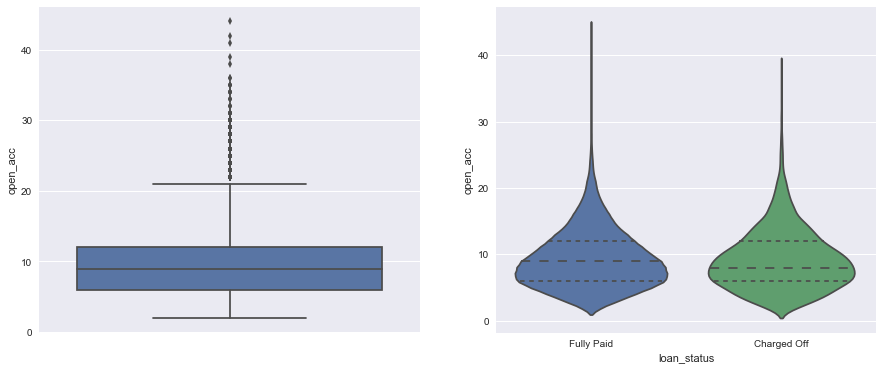

In [70]:
uni_analysis_num(loan_df[['open_acc', 'loan_status']])

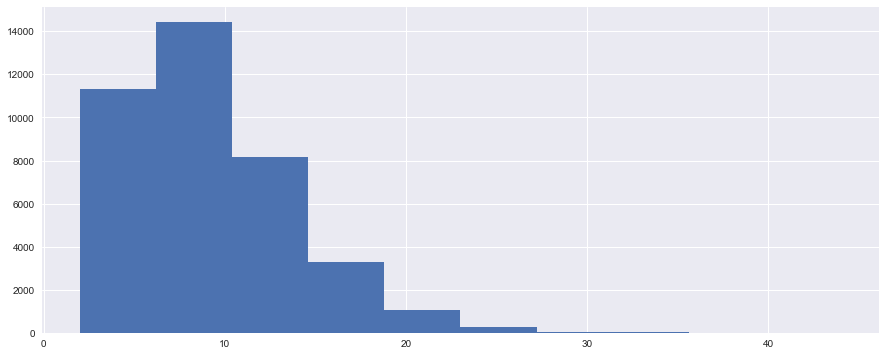

In [71]:
num_bins = 10
n, bins, patches = plt.hist(loan_df.open_acc, num_bins)
plt.show()

In [75]:
# derived matrix based on open_acc and total_acc
loan_df['open_acc_by_total_acc'] = loan_df.open_acc/loan_df.total_acc

In [77]:
loan_df.open_acc_by_total_acc.describe()

count    38577.000000
mean         0.470873
std          0.186648
min          0.051282
25%          0.333333
50%          0.444444
75%          0.583333
max          1.750000
Name: open_acc_by_total_acc, dtype: float64

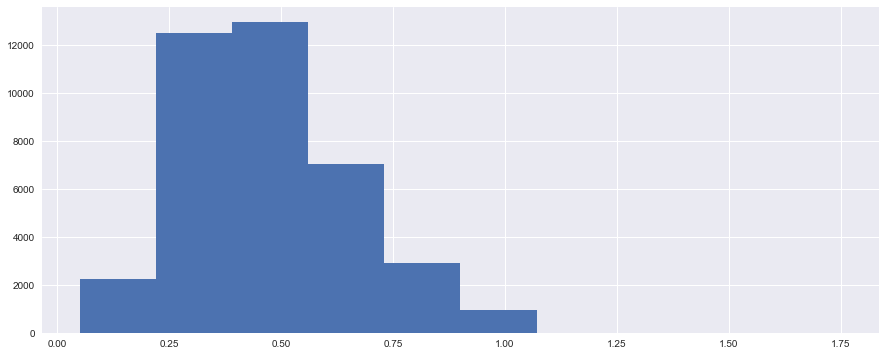

In [78]:
num_bins = 10
n, bins, patches = plt.hist(loan_df.open_acc_by_total_acc, num_bins)
plt.show()

Variable = open_acc_by_total_acc
Mean Value  0.4708733432875019
Median  0.4444444444444444
****************************************************************************************************


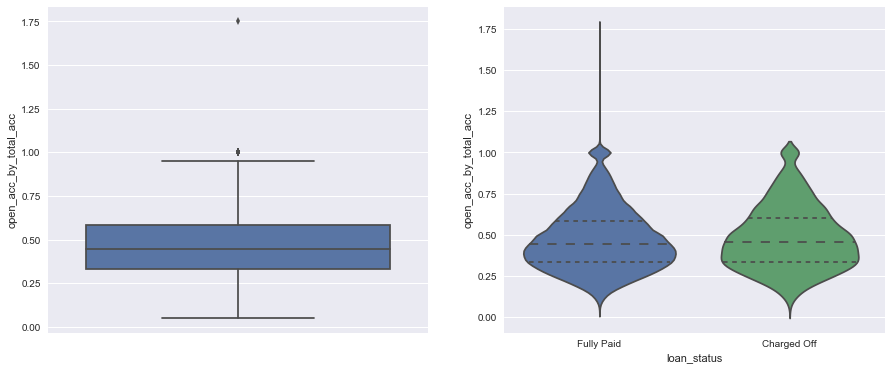

In [88]:
uni_analysis_num(loan_df[['open_acc_by_total_acc', 'loan_status']])

__Business understanding after analysing `open_acc`__
<br>
The spread for fully paid and charged off loans seams to be same, so distinction cannot be made
<br>
The derived matrix open_acc_by_total_acc suggest nothing in particular, as distribution is similar to open_acc 


**understanding `pub_rec`** 
<br>
Number of derogatory public records

In [81]:
loan_df['pub_rec'].describe()

count    38577.000000
mean         0.055422
std          0.237804
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

Variable = pub_rec
Mean Value  0.05542162428389973
Median  0.0
****************************************************************************************************


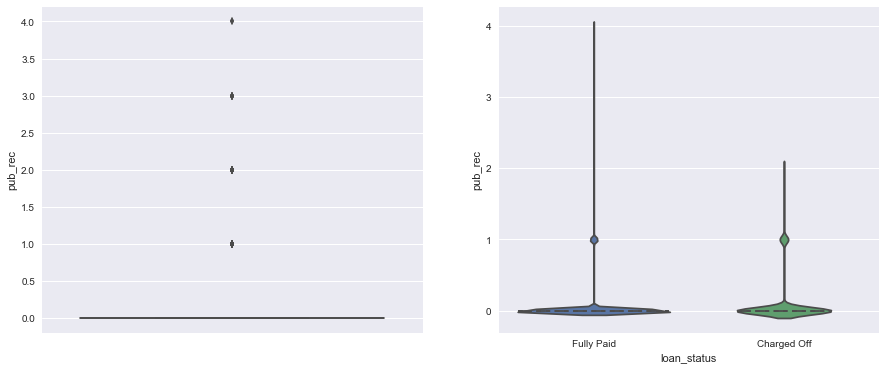

In [89]:
# Doing Univariate analysis 

uni_analysis_num(loan_df[['pub_rec', 'loan_status']])

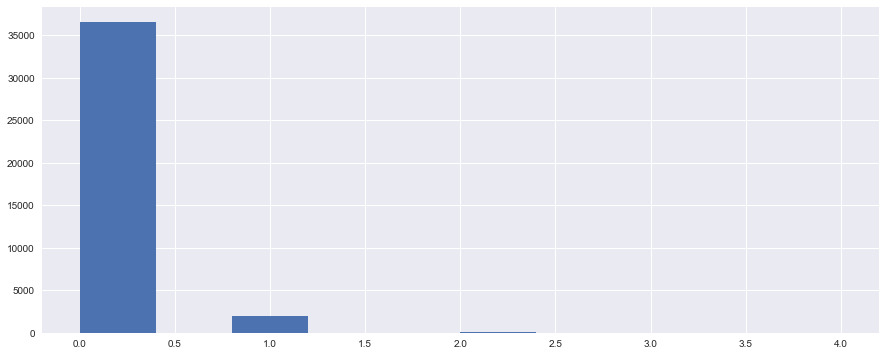

In [83]:
num_bins = 10
n, bins, patches = plt.hist(loan_df.pub_rec, num_bins)
plt.show()

In [139]:
propensity_default =loan_df.groupby(['pub_rec','loan_status'])['pub_rec'].count()*100/loan_df.groupby(['pub_rec'])['pub_rec'].count()
propensity_default.sort_values(ascending=False)

pub_rec  loan_status
4        Fully Paid     100.000000
3        Fully Paid     100.000000
0        Fully Paid      85.865724
2        Fully Paid      79.166667
1        Fully Paid      77.297566
         Charged Off     22.702434
2        Charged Off     20.833333
0        Charged Off     14.134276
Name: pub_rec, dtype: float64

__Business understanding after analysing `pub_rec`__
<br>
If the Public record is 1 or 2, there is a high propensity to default

**understanding `pub_rec_bankruptcies`** 
<br>
Number of public record bankruptcies

In [86]:
loan_df['pub_rec_bankruptcies'].describe()

count    38577.000000
mean         0.042694
std          0.202809
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

Variable = pub_rec_bankruptcies
Mean Value  0.04269383311299479
Median  0.0
****************************************************************************************************


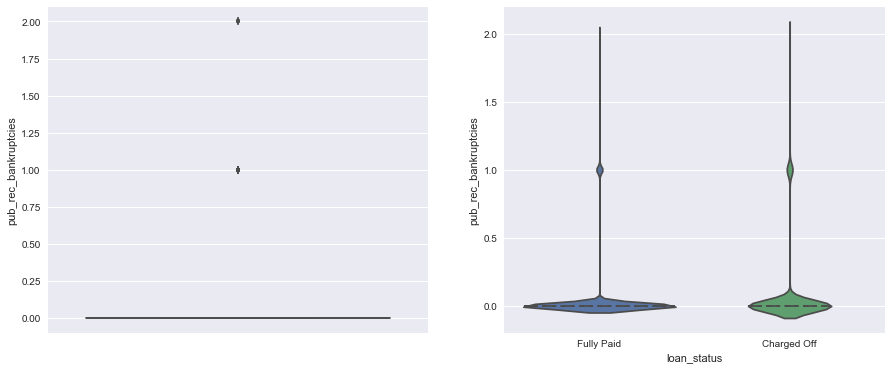

In [90]:
# Doing Univariate analysis 

uni_analysis_num(loan_df[['pub_rec_bankruptcies', 'loan_status']])

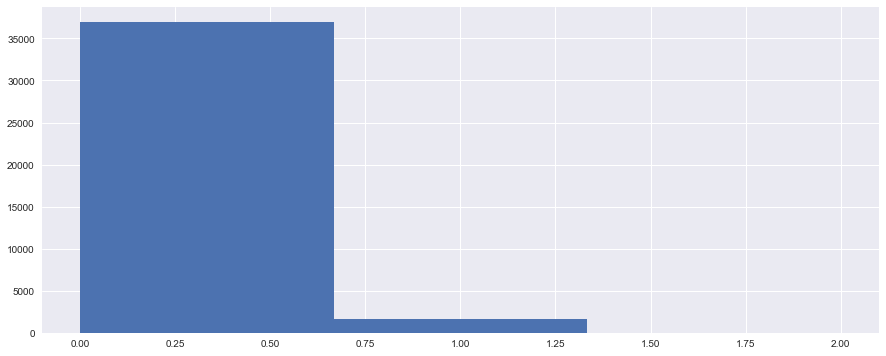

In [92]:
num_bins = 3
n, bins, patches = plt.hist(loan_df.pub_rec_bankruptcies, num_bins)
plt.show()

In [140]:
propensity_default =loan_df.groupby(['pub_rec_bankruptcies','loan_status'])['pub_rec_bankruptcies'].count()*100/loan_df.groupby(['pub_rec_bankruptcies'])['pub_rec_bankruptcies'].count()
propensity_default.sort_values(ascending=False)

pub_rec_bankruptcies  loan_status
0.0                   Fully Paid     85.761473
1.0                   Fully Paid     77.642028
2.0                   Fully Paid     60.000000
                      Charged Off    40.000000
1.0                   Charged Off    22.357972
0.0                   Charged Off    14.238527
Name: pub_rec_bankruptcies, dtype: float64

** Business understanding after analysing `pub_rec_bankruptcies`**
<br>

If the Public record is 1 or 2, there is a high propensity to default

**Understanding if `pub_rec` and `pub_rec_bankruptcies` are correlated**

In [141]:
loan_df[['pub_rec','pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.000000,0.841571
pub_rec_bankruptcies,0.841571,1.000000


**we can either keep `pub_rec` or `pub_rec_bankruptcies` as the two datasets are correlated**

**understanding `purpose` **
<br>
A category provided by the borrower for the loan request.

In [99]:
loan_df['purpose'].describe()

count                  38577
unique                    14
top       debt_consolidation
freq                   18055
Name: purpose, dtype: object

In [ ]:
# Doing Univariate analysis 

<div class="alert alert-block alert-info">
Using Kamal's function for Univariate analysis for categorical Variable
</div> 

In [102]:
# Write Function to perform univariate analysis on categorical variables 

def uni_analysis_cat (x , summary = 0):
    sns.set(rc={'figure.figsize':(15,6)})
    f, axes = plt.subplots(1, 2)
       
    if(~summary):
        print(x.iloc[:,0].value_counts())
        sns.countplot( x = x.iloc[:,0], data = x , ax = axes[0])
        sns.countplot( x = x.iloc[:,0], hue = x.iloc[:,1] , data = x , ax = axes[1] )
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        print('****************************************************************************************************')
        ctab = pd.crosstab(x.iloc[:,1] ,x.iloc[:,0] , margins = False ,\
                           margins_name = 'Total' , normalize = True).round(4) * 100
        
        # plot the heat map for the cross tab 
        fm , main = plt.subplots()
        sns.heatmap(ctab ,cmap = 'Greens' , annot = True)

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64
****************************************************************************************************


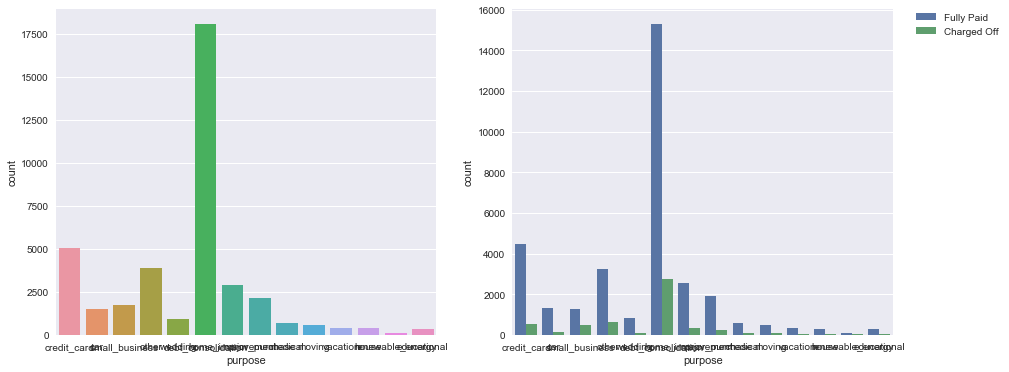

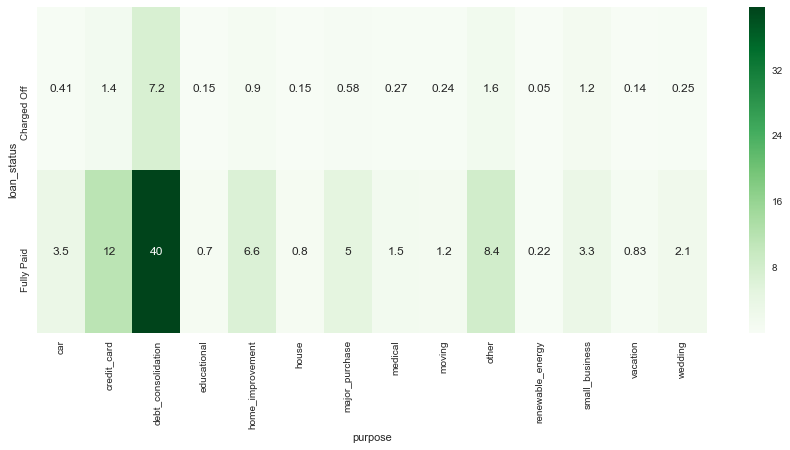

In [103]:
uni_analysis_cat(loan_df[['purpose' , 'loan_status']])

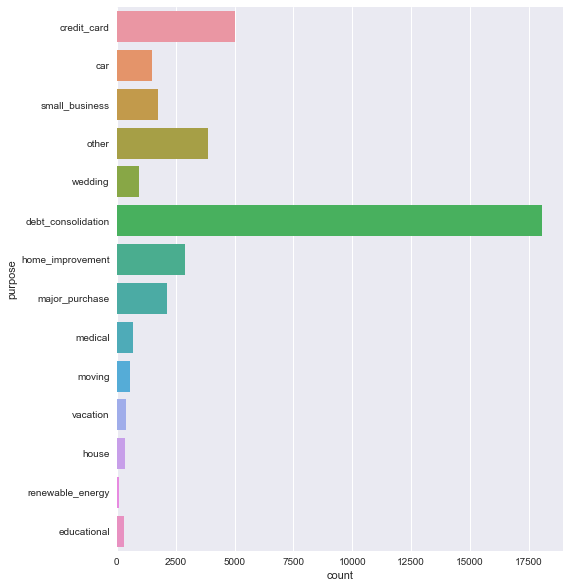

In [105]:
plt.figure(figsize=(8,10))
sns.countplot(y=loan_df.purpose)
plt.show()

In [138]:
propensity_default =loan_df.groupby(['purpose','loan_status'])['purpose'].count()*100/loan_df.groupby(['purpose'])['purpose'].count()
propensity_default.sort_values(ascending=False)

purpose             loan_status
major_purchase      Fully Paid     89.674419
wedding             Fully Paid     89.632829
car                 Fully Paid     89.326217
credit_card         Fully Paid     89.218222
home_improvement    Fully Paid     87.930435
vacation            Fully Paid     85.866667
debt_consolidation  Fully Paid     84.674605
medical             Fully Paid     84.434655
moving              Fully Paid     84.027778
house               Fully Paid     83.923706
other               Fully Paid     83.622251
educational         Fully Paid     82.769231
renewable_energy    Fully Paid     81.372549
small_business      Fully Paid     72.919042
                    Charged Off    27.080958
renewable_energy    Charged Off    18.627451
educational         Charged Off    17.230769
other               Charged Off    16.377749
house               Charged Off    16.076294
moving              Charged Off    15.972222
medical             Charged Off    15.565345
debt_consolidation  Cha

** We can see that small_business, renewable_energy, educational are purposes where the propensity for default is high**   

**Business understanding after analysing `purpose` **

This is an important parameter as it has relevance for Default

** understanding `revol_bal`**<br>Total credit revolving balance

In [144]:
loan_df['revol_bal'].describe()

count     38577.000000
mean      13289.489826
std       15866.492241
min           0.000000
25%        3650.000000
50%        8762.000000
75%       16912.000000
max      149588.000000
Name: revol_bal, dtype: float64

Variable = revol_bal
Mean Value  13289.489825543718
Median  8762.0
****************************************************************************************************


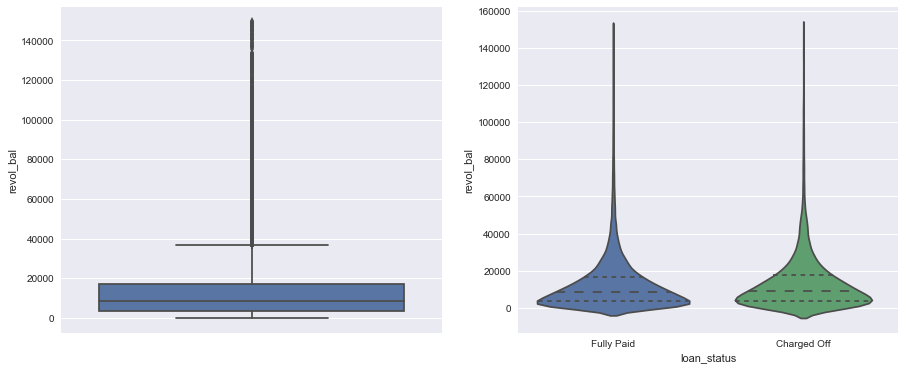

In [145]:
# Doing Univariate analysis 

uni_analysis_num(loan_df[['revol_bal', 'loan_status']])

__Business understanding after analysing `revol_bal`__
<br>
The spread for fully paid and charged off loans seams to be same, so distinction cannot be made



###   Peeyush Updates end here